<a id='top'></a>

# CSCI3022 F20
# Homework 1: Data Cleaning and Exploratory Data Analysis 
***

**Name**: Clayton Schneider

***

This assignment is due on Canvas by **MIDNIGHT on Friday September 4**. Your solutions to theoretical questions should be done in Markdown directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your classmates, but **you must write all code and solutions on your own**.

**NOTES**: 

- Any relevant data sets should be available on Canvas. To make life easier on the graders if they need to run your code, do not change the relative path names here. Instead, move the files around on your computer.
- If you're not familiar with typesetting math directly into Markdown then by all means, do your work on paper first and then typeset it later.  Remember that there is a [reference guide](https://math.meta.stackexchange.com/questions/5020/mathjax-basic-tutorial-and-quick-reference) linked on Canvas on writing math in Markdown. **All** of your written commentary, justifications and mathematical work should be in Markdown.
- Because you can technically evaluate notebook cells is a non-linear order, it's a good idea to do Kernel $\rightarrow$ Restart & Run All as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected. 
- It is **bad form** to make your reader interpret numerical output from your code.  If a question asks you to compute some value from the data you should show your code output **AND** write a summary of the results in Markdown directly below your code. 
- 95 points of this assignment are in problems.  The remaining 5 are for neatness, style, and overall exposition of both code and text.
- This probably goes without saying, but... For any question that asks you to calculate something, you **must show all work and justify your answers to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit. 

---
**Shortcuts:**  [Problem 1](#p1) | [Problem 2](#p2) | [Problem 3](#p3) | [Problem 4](#p4) |
---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

[Back to top](#top)

<br>

<a/ id='p1'></a>

### (20 points) Problem 1: Theory (Sampling)
***

<img style="float: left; width: 200px; padding: 3mm;" src="https://upload.wikimedia.org/wikipedia/commons/5/57/Acme_ballot_box_-_Smithsonian.jpg" alt="A ballot box"/>  
You are the head of a news outlet on election day. You have embedded journalists in key U.S. States in order sample voters at different polling stations in the states. Once your journalists choose a polling station, they monitor the station for the election day. The journalists then report back the number of votes for each candidate, which is recorded in a special App on your phone, called Hippocampus. Overall, your team collected data from 6 polling stations in Alaska, 36 polling stations in Ohio, 12 polling stations in Colorado, 6 polling stations in Iowa, and 42 polling stations from California.

You want to get a sense of the average amount of votes for each candidate per polling station, so you use the Hippocampus app to randomly choose 1 polling station in Alaska, 6 polling stations in Ohio, 2 polling stations in Colorado, 1 polling station in Iowa, and 7 polling stations from California.

$$ \quad $$
    
**Part A:** Identify the following: 

- the population 
- the sample frame 
- the sample 
- the type of sample 
- the quantity of interest

In [2]:
def mean(arr, ddof=0):
    sum = 0
    for item in arr:
        sum = sum + item
    mean = sum / (len(arr)-ddof)
    return(mean)

def median(arr):
    arr = sorted(arr)
    if len(arr) % 2 == 0:
        median = (arr[(len(arr) // 2) - 1] + arr[(len(arr) // 2)]) / 2
    else:
        median = arr[len(arr) // 2]
    return median

def var(arr):
    arrmean = mean(arr)
    sqerr = []
    for item in arr:
        sqerr.append(item - arrmean)
    sqerr = np.square(sqerr)
    return(mean(sqerr, ddof=1))

def std(arr):
    return(np.sqrt(var(arr)))

- the population: 17
- the sample frame: 1/6 of the polling stations from each state, randomly chosen
- the sample: 

**Part B:** You repeat your sampling, again using the Hippocampus app. Now, you order the stations alphabetically by State and choose every 3rd data value. 
    
Identify the following: 

- the population 
- the sample frame 
- the sample 
- the type of sample 
- the quantity of interest

**Typeset your solution to part B in this cell or cells**

[Back to top](#top)

<br>

<a/ id='p2'></a>

### (20 points) Problem 2: Theory and Computation (Means and Medians)
***

A method to investigate the sensitivity of the sample mean and sample median to extreme outliers and changes in the dataset is to replace one or more elements in a given dataset by a number $y$ and investigate the effect when $y$ changes. To illustrate this, consider the following dataset:
 
$$  4.2 \quad 5.1 \quad 5.0 \quad y \quad 3.8 \quad 4.1 \quad 5.5 \quad 1.9 $$




**Part A:** Compute the sample mean and sample median for $y=1.5$. Then compute both quantities again for $y=6$.

In [3]:
list = [4.2, 5.1, 5.0, 1.5, 3.8, 4.1, 5.5, 1.9]
print("Mean of list with y=1.5:", mean(list))
print("Median of list with y=1.5:", median(list))

list = [4.2, 5.1, 5.0, 6, 3.8, 4.1, 5.5, 1.9]
print("Mean of list with y=6:", mean(list))
print("Median of list with y=6:", median(list))

Mean of list with y=1.5: 3.8875
Median of list with y=1.5: 4.15
Mean of list with y=6: 4.45
Median of list with y=6: 4.6


**Part B:** Is there a value for $y$ that would make the mean of the data equal to 6? If so, calculate the value of $y$ that makes the mean equal to 6. If not, clearly explain why not.
    
Is there a value for $y$ that would make the median of the data equal to 6? If so, calculate the values of $y$ that makes the median equal to 6. If not, clearly explain why not.

Yes, the value of the mean of the list would be six if (4.2 + 5.1 + 5.0 + 3.8 + 4.1 + 5.5 + 1.9 + y) / 8 = 6

so y = 18.4 satisfies this condition

No, the median cannot be 6, since 6 1. is not sampled in the list, and 2. is larger than any of the other values, and so unlike the mean an outlier cannot satisfy the given condition. 

**Part C**: Compute the sample variance and the sample standard deviation for the original dataset given in part A, with $y=6$.

In [4]:
list = [4.2, 5.1, 5.0, 6, 3.8, 4.1, 5.5, 1.9]

variance = var(list)
stderr = std(list)

print("Variance of list:", variance)
print("Standard deviation of list:", stderr)

Variance of list: 1.6199999999999999
Standard deviation of list: 1.2727922061357855


**Part D**: Compute the sample median for the following cases: 
- $y=5$ 
- $y=50$ 
- $y=4.36$ 
- $y \to \infty$ 
- $y \to -\infty$

In [5]:
list = [4.2, 5.1, 5.0, 5.0, 3.8, 4.1, 5.5, 1.9]
print("Median for y=5:", median(list))

list = [4.2, 5.1, 5.0, 50, 3.8, 4.1, 5.5, 1.9]
print("Median for y=50:", median(list))

list = [4.2, 5.1, 5.0, 4.36, 3.8, 4.1, 5.5, 1.9]
print("Median for y=4.36:", median(list))

list = [4.2, 5.1, 5.0, float('inf'), 3.8, 4.1, 5.5, 1.9]
print("Median for y approaching infinity:", median(list))

list = [4.2, 5.1, 5.0, float('inf')*-1, 3.8, 4.1, 5.5, 1.9]
print("Median for y approaching negative infinity:", median(list))

Median for y=5: 4.6
Median for y=50: 4.6
Median for y=4.36: 4.28
Median for y approaching infinity: 4.6
Median for y approaching negative infinity: 4.15


**Part E**: Think about the previous parts, above, and describe in words or mathematical notation the answers to the following two questions:

- By varying $y$, what is the set of all the possible values that the sample mean could take on?
- By varying $y$, what is the set of all the possible values that the sample median could take on? Specifically, for what sets of $y$ values does the median take on its different possible values?

The sample mean could take on any value between positive and negative infinity given a large enough deviation in y. 

The sample median could be the middle-most numbers of the list, {4.1, 4.2}, or $y$ if it falls between them. If $y$ has a value, then it will be that the median is the average of the 2 middle-most numbers, so will either be an average of $y$ and 4.1, $y$ and 4.2, of 4.1 and 4.2, or of 4.2 and 5.0. 

**Part F**: Describe in words or mathematical notation, what happens to the sample standard deviation when $y$ is varied in the following ways: 
 
- $y \to \infty$ 
- $y \to \bar{x}$

As $y$ approaches infinity, so does the sample standard deviation. 

In [6]:
list = [4.2, 5.1, 5.0, 4.228571428571429, 3.8, 4.1, 5.5, 1.9]

print(mean(list))
print(std(list))

4.228571428571429
1.1080411102665895


In [7]:
list = [4.2, 5.1, 5.0, 3.8, 4.1, 5.5, 1.9]

print(mean(list))
print(std(list))
print(np.sqrt(std(list)))

4.228571428571429
1.196821186468953
1.0939932296266524


[Back to top](#top)
<a/ id='p6'></a>

## (20 pts) Problem 3: Computation (Scaling)
***
Consider the following 3 data sets:

`A=[0,1,2,3,4,5,6,7,8,9,10,11,12]`

`B=[0,0,0,12,7,18,47,25,0,13,0,35]`

`C` is the random data set generated by using `np.random.exponential(scale=43, size=1000)`

For each data set, perform the following computations in parts A, B, and C:

**Part A:** Compute and print the mean and standard deviation of the data set.

In [8]:
C=np.random.exponential(scale=43, size=1000)

In [9]:
A=[0,1,2,3,4,5,6,7,8,9,10,11,12]
print("Mean of A:", mean(A))
print("Std of A:", std(A))

B=[0,0,0,12,7,18,47,25,0,13,0,35]
print("Mean of B:", mean(B))
print("Std of B:", std(B))

print("Mean of C:", mean(C))
print("Std of C:", std(C))

Mean of A: 6.0
Std of A: 3.8944404818493075
Mean of B: 13.083333333333334
Std of B: 15.64061341120571
Mean of C: 43.0862385616184
Std of C: 45.066643374810056


**Part B:** Compute and print  the mean and standard deviation of the new data set formed by subtracting the original mean from each observation.

In [10]:
newA = [item - mean(A) for item in A]
newB = [item - mean(B) for item in B]
newC = [item - mean(C) for item in C]

print("Mean of new A:", mean(newA))
print("Std of new A:", std(newA))

print("Mean of new B:", mean(newB))
print("Std of new B:", std(newB))

print("Mean of new C:", mean(newC))
print("Std of new C:", std(newC))

Mean of new A: 0.0
Std of new A: 3.8944404818493075
Mean of new B: -1.1842378929335002e-15
Std of new B: 15.64061341120571
Mean of new C: 1.0666667549230624e-13
Std of new C: 45.06664337481006


**Part C:** Compute and print  the mean and standard deviation of the new data set formed by subtracting the original mean from each observation and then dividing by the original standard deviation.

In [11]:
newerA = [(item - mean(A))/std(A) for item in A]
newerB = [(item - mean(B))/std(B) for item in B]
newerC = [(item - mean(C))/std(C) for item in C]

print("Mean of newer A:", mean(newerA))
print("Std of newer A:", std(newerA))

print("Mean of newer B:", mean(newerB))
print("Std of newer B:", std(newerB))

print("Mean of newer C:", mean(newerC))
print("Std of newer C:", std(newerC))

Mean of newer A: -5.124106267500723e-17
Std of newer A: 0.9999999999999999
Mean of newer B: -1.850371707708594e-17
Std of newer B: 0.9999999999999999
Mean of newer C: 2.3560042805570447e-15
Std of newer C: 1.0000000000000007


**Part D:** Why might this result matter?

In part B, we've (very nearly?) centered the dataset around a mean of 0. In the next part, we've scaled each such that the standard deviation is = 1. 

**Part E:** Looking at each of the 3 data sets, come up with a real-world context where those kind of numbers might make for reasonable observations.

When viewing EEG data in real life, it's often useful to center the waveform around 0, so that deviations are able to be more easily read as either hyperpolarizations or depolarizations of sets of neurons.

The scaling of the dataset so std=1 could help with threshold detection algorithms like peak-detection, or outlier-detection algorithms for artifacting movement-related data, etc. 

[Back to top](#top)
<a/ id='p4'></a>

## (35 pts) Problem 4: Data (monthly patterns)
***

NOAA's Physical Sciences division (https://www.esrl.noaa.gov/psd) houses an enormous amount of weather data.  Load `BoulderPrecip.csv` from the course page for the last 120 years of monthly precipitation data from Boulder.  Let's take a look!

In [12]:
dfPrecip = pd.read_csv('../Data/BoulderPrecip.csv')
dfPrecip.head()

,Year,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,YEAR TOTAL
0,1900,0.4,1.06,0.75,9.18,1.84,0.49,0.48,0.22,1.54,0.13,0.19,0.61,16.89
1,1901,0.53,0.3,1.74,3.51,1.62,1.76,0.46,1.69,0.16,0.65,Tr,1.43,13.85
2,1902,0.37,0.48,1.48,1.01,2.32,1.46,1.26,0.53,5.46,1.44,1.29,1.34,18.44
3,1903,0.08,1.52,1.45,2.31,2.02,1.87,0.95,1.46,1.31,3.43,0.15,0.16,16.71
4,1904,0.09,0.31,2.37,1.45,5.35,2.72,1.05,1.00,1.6,1.06,0.08,0.7,17.78


**Part A:** SCRUBBING!  Our data set is going to be tough to use for a few reasons.

1) When the amount of precipitation was nonzero but too small to be recorded, this data set recorded `tr`.  Replace these with zeroes.

2) 2020 isn't over yet!  We have one row at the bottom that isn't fully complete and NA values have been filled into the months that haven't happened yet.  This can wreak havoc on a lot of our methods!  Drop the 2020 data entirely.

3) You may have some object typing issues relating to columns that contained both "Tr"/"NA" and numeric values.  Ensure that Python is treating all of your data as numeric!

In [13]:
dfPrecip.replace("Tr", float(0), inplace=True)

In [14]:
dfPrecip.drop(dfPrecip[dfPrecip.Year == int('2020')].index, inplace=True)

In [15]:
# check to see if any of the columns aren't numeric
dfPrecip.apply(lambda s: pd.to_numeric(s, errors='coerce').notnull().all())

Year           True
JAN            True
FEB            True
MAR            True
APR            True
MAY            True
JUN            True
JUL            True
AUG            True
SEP            True
OCT            True
NOV            True
DEC            True
YEAR TOTAL    False
dtype: bool

In [16]:
# since 'YEAR TOTAL' wasn't, convert that column to float
# failed for trailing whitespace, so removed from each value
#dfPrecip = dfPrecip.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
#dfPrecip['YEAR TOTAL'] = pd.to_numeric(dfPrecip['YEAR TOTAL'], downcast="float")

In [17]:
dfPrecip

,Year,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,YEAR TOTAL
0,1900,0.4,1.06,0.75,9.18,1.84,0.49,0.48,0.22,1.54,0.13,0.19,0.61,16.89
1,1901,0.53,0.3,1.74,3.51,1.62,1.76,0.46,1.69,0.16,0.65,0,1.43,13.85
2,1902,0.37,0.48,1.48,1.01,2.32,1.46,1.26,0.53,5.46,1.44,1.29,1.34,18.44
3,1903,0.08,1.52,1.45,2.31,2.02,1.87,0.95,1.46,1.31,3.43,0.15,0.16,16.71
4,1904,0.09,0.31,2.37,1.45,5.35,2.72,1.05,1.00,1.6,1.06,0.08,0.7,17.78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,2015,0.38,3.69,0.38,4.50,7.82,1.76,2.98,0.31,0.14,2.02,1.83,1.11,27.39
116,2016,0.37,1.44,3.84,3.34,2.01,2.37,0.61,1.06,0.45,0.38,0.47,0.91,17.25
117,2017,1.41,0.73,1.45,3.15,6.29,0.45,1.30,1.62,1.92,2.42,0.57,0.68,21.89
118,2018,0.74,1.04,2.23,1.35,4.76,1.82,1.84,0.24,1.02,2.68,1.19,0.34,19.01


**Part B:** Generate a series of 12 box plots with month as the x axis and precipitation on the y-axis.

In [18]:
months = [month for month in dfPrecip.columns[1:-1]]

npdataset = dfPrecip[months].to_numpy()

npdataset

array([['0.4', '1.06', 0.75, ..., '0.13', '0.19', '0.61'],
       ['0.53', '0.3', 1.74, ..., '0.65', 0.0, '1.43'],
       ['0.37', '0.48', 1.48, ..., '1.44', '1.29', '1.34'],
       ...,
       ['1.41', '0.73', 1.45, ..., '2.42', '0.57', '0.68'],
       ['0.74', '1.04', 2.23, ..., '2.68', '1.19', '0.34'],
       ['1.57', '0.74', 2.83, ..., '2.42', '2.38', '0.35']], dtype=object)

In [24]:
npdataset = npdataset.astype("float")

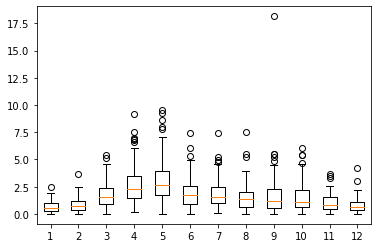

In [27]:
fig = plt.boxplot(npdataset)


**Part C:** Spring is the wet season in Boulder.   But what is Spring?

Atmospheric scientists love to group months seasonally, breaking the year into a Winter season including December, January, February; a Spring including March, April, and May; and so forth.

The solar year, however, says that Spring runs from near the end of March until near the end of June: let's round at the nearest month and say that it includes the months of April, May and June.

Generate a box plot with precipitation on the y-axis and the two possible monthly 'Spring' groupings (March-May versus April-June) as the x-axis.

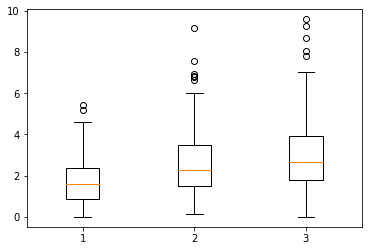

In [30]:
fig1 = plt.boxplot(npdataset[:, 2:5])

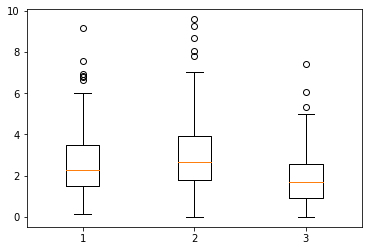

In [31]:
fig2 = plt.boxplot(npdataset[:, 3:6])

**Part D:** These might look pretty similar!  Highlight and comment on any differences by calculating the mean, standard deviation, and a Tukey five number summary of each classification of Spring.  Is there a reason here to favor one grouping over the other?

In [37]:
# figure 1

fig1data = np.concatenate(npdataset[:, 2:5])

fig1mean = mean(fig1data)
print("Mean of figure 1 data:", fig1mean)

fig1std = std(fig1data)
print("Std of figure 1 data:", fig1std)

# 5 number summary
min1 = np.min(fig1data)
print("Minimum of figure 1 data:", min1)

q1fig1 = np.percentile(fig1data, 25)
print("Q1 of figure 1 data:", q1fig1)

medianfig1 = median(fig1data)
print("Median of figure 1 data:", medianfig1)

q3fig1 = np.percentile(fig1data, 75)
print("Q3 of figure 1 data:", q3fig1)

max1 = np.max(fig1data)
print("Maximum of figure 1 data:", max1)

Mean of figure 1 data: 2.506333333333334
Std of figure 1 data: 1.6817994740016091
Minimum of figure 1 data: 0.0
Q1 of figure 1 data: 1.3575
Median of figure 1 data: 2.09
Q3 of figure 1 data: 3.3724999999999996
Maximum of figure 1 data: 9.59


In [38]:
# figure 2

fig2data = np.concatenate(npdataset[:, 3:6])

fig2mean = mean(fig2data)
print("Mean of figure 2 data:", fig2mean)

fig2std = std(fig1data)
print("Std of figure 2 data:", fig2std)

# 5 number summary
min2 = np.min(fig2data)
print("Minimum of figure 2 data:", min2)

q1fig2 = np.percentile(fig2data, 25)
print("Q1 of figure 2 data:", q1fig2)

medianfig2 = median(fig2data)
print("Median of figure 2 data:", medianfig2)

q3fig2 = np.percentile(fig2data, 75)
print("Q3 of figure 2 data:", q3fig2)

max2 = np.max(fig2data)
print("Maximum of figure 2 data:", max2)

Mean of figure 2 data: 2.56063888888889
Std of figure 2 data: 1.6817994740016091
Minimum of figure 2 data: 0.0
Q1 of figure 2 data: 1.35
Median of figure 2 data: 2.09
Q3 of figure 2 data: 3.47
Maximum of figure 2 data: 9.59


**Part E:** Create a density histogram of the September precipitation.  Classify and describe this histogram, including discussion of any skewness, multimodality, or outliers.  Find the data point associated with September, 2013, and recreate your histogram with that value in a different color or otherwise clearly marked.

**Typeset your analysis for part E in this cell or cells**